<a href="https://colab.research.google.com/github/novita824/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3.) Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 260 artists>

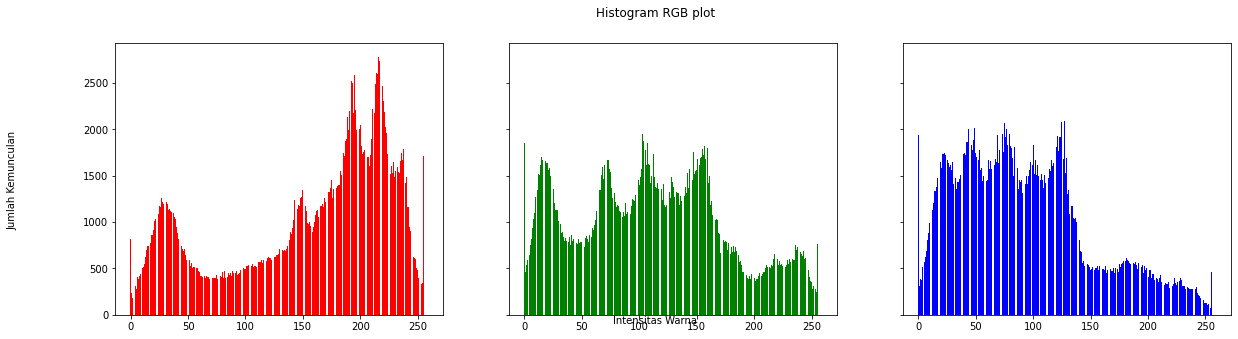

In [23]:
original = cv.imread('/content/drive/MyDrive/lena.jpg')
height, width, depth = np.shape(original)
angka = np.arange(260)

red = [0]*260
green = [0]*260
blue = [0]*260

for y in range(0,height):
  for x in range(0, width):
    blue[original[y][x][0]] += 1
    green[original[y][x][1]] += 1
    red[original[y][x][2]] += 1

angka = np.arange(260)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05,0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5,0.10, 'Intensitas Warna', ha='center')
axs[0].bar(angka, red, color='red')
axs[1].bar(angka, green, color='green')
axs[2].bar(angka, blue, color='blue')